In [1]:
import torch
from torch_geometric.datasets import TUDataset
import networkx as nx

# Step 1: Load the dataset
dataset = TUDataset(root='.', name='MUTAG', use_node_attr=True)

# Step 2: Convert to NetworkX
def convert_to_networkx(data):
    # Extract graph information
    edge_index = data.edge_index
    edge_attr = data.edge_attr
    x = data.x

    # Create a NetworkX graph
    G = nx.Graph()

    # Add nodes with attributes
    for i in range(x.size(0)):
        G.add_node(i, attr_dict={'feat': x[i].tolist()})

    # Add edges with attributes
    for j in range(edge_index.size(1)):
        src, dst = edge_index[0][j].item(), edge_index[1][j].item()
        attr = {'feat': edge_attr[j].tolist()} if edge_attr is not None else {}
        G.add_edge(src, dst, attr_dict=attr)

    return G

# Step 3: Collect graphs into a list
training_graphs = [convert_to_networkx(data) for data in dataset]

# Now you have a list of NetworkX graphs stored in 'networkx_graphs'


/home/eigil/miniconda3/envs/adlcv-ex1/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
training_data_graph_hash = [nx.weisfeiler_lehman_graph_hash(G) for G in training_graphs]

In [37]:
from ErdösRényi import generate_erdos_graphs
generated_graphs = generate_erdos_graphs(1000)

In [86]:
generated_data_graph_hash = [nx.weisfeiler_lehman_graph_hash(G) for G in generated_graphs]

In [87]:
novel = [hash for hash in generated_data_graph_hash if not hash in training_data_graph_hash]
precent_novel = len(novel)/len(generated_data_graph_hash)

In [78]:
unique = list(set(generated_data_graph_hash))
pecent_unique = len(unique)/len(generated_data_graph_hash)

In [85]:
novel_and_unique = [hash for hash in unique if not hash in training_data_graph_hash]
pecent_novel_and_unique = len(novel_and_unique)/len(generated_data_graph_hash)

In [3]:
G = training_graphs[0]

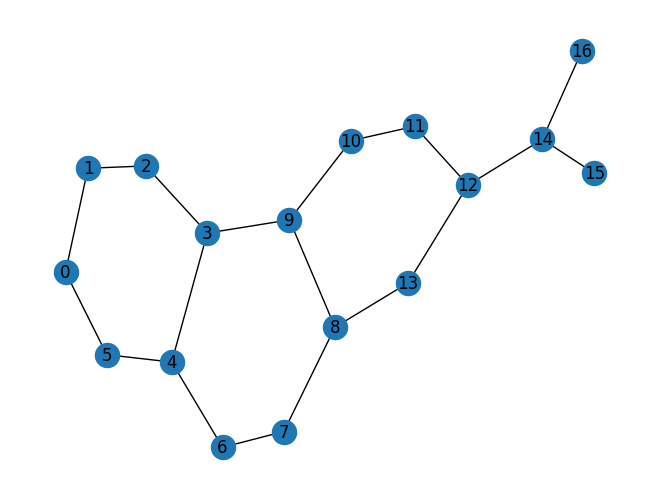

In [4]:
nx.draw(G, with_labels=True)

In [5]:
G.degree()

DegreeView({0: 2, 1: 2, 2: 2, 3: 3, 4: 3, 5: 2, 6: 2, 7: 2, 8: 3, 9: 3, 10: 2, 11: 2, 12: 3, 13: 2, 14: 3, 15: 1, 16: 1})

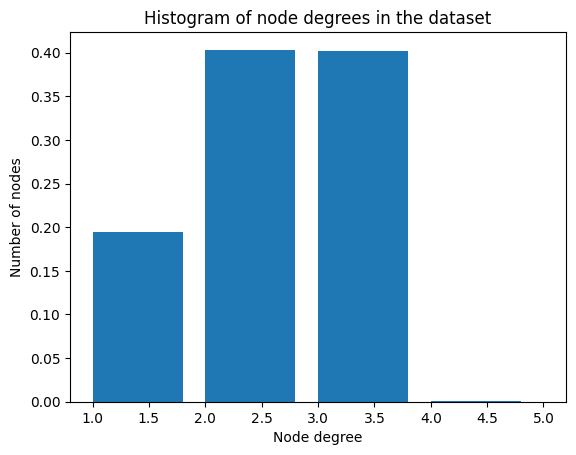

In [14]:
node_degree_histogram(training_graphs)

In [13]:
import matplotlib.pyplot as plt
def node_degree_histogram(graphs):
    degrees = []
    for G in graphs:
        degrees.extend([d for n, d in G.degree()])
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), density=True, width=.8)
    plt.xlabel('Node degree')
    plt.ylabel('Number of nodes')
    plt.title('Histogram of node degrees in the dataset')
    plt.show()


def clustering_coefficient_histogram(graphs):
    clustering_coefficients = []
    for G in graphs:
        clustering_coefficients.append(nx.average_clustering(G))
    plt.hist(clustering_coefficients, bins=20, density=True)
    plt.xlabel('Average clustering coefficient')
    plt.ylabel('Number of graphs')
    plt.title('Histogram of average clustering coefficient in the dataset')
    plt.show()

def eigenvector_centrality_histogram(graphs):
    eigenvector_centralities = []
    for G in graphs:
        eigenvector_centralities.extend(list(nx.eigenvector_centrality(G).values()))
    plt.hist(eigenvector_centralities, bins=20, density=True)
    plt.xlabel('Eigenvector centrality')
    plt.ylabel('Number of nodes')
    plt.title('Histogram of eigenvector centralities in the dataset')
    plt.show()

In [15]:
nx.eigenvector_centrality(G)

{0: 0.1326585143432615,
 1: 0.1402243624711628,
 2: 0.21183759815169054,
 3: 0.380206169668117,
 4: 0.32352188660335796,
 5: 0.18568467598889415,
 6: 0.22891900904261103,
 7: 0.23887216426068064,
 8: 0.35792525644914486,
 9: 0.3987073788675928,
 10: 0.2413843083485574,
 11: 0.19430646238771263,
 12: 0.23597004641686314,
 13: 0.24174389340162827,
 14: 0.14365772977989122,
 15: 0.05847627207094,
 16: 0.05847627207094}